In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src')) # include top level package in python path

In [2]:
import torch
from model.fuzzy_logic import (
    ProductLogic, 
    MinimumLogic, 
    LukasiewiczLogic, 
    DrasticLogic,
    SchweizerSklarLogic,
    HamacherLogic,
    WNLLogic
)
import matplotlib.pyplot as plt

In [3]:
p = torch.nn.Parameter(torch.tensor([0.3,0.3]), requires_grad=True)
loss = SchweizerSklarLogic(torch.tensor(-2.0)).bin_conjoin(p[0], p[1])
loss.backward()
p.grad

torch.Size([2]) torch.Size([])


tensor([0.3788, 0.3788])

In [4]:
def plot_fuzzy_binop(f):
    ls = torch.linspace(0,1,100)
    y = (ls + torch.zeros((100,1))).flatten()
    x = (ls.unsqueeze(-1) + torch.zeros(100)).flatten()
    z = f(x,y)
    my_cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection ='3d')
    ax.view_init(elev=20., azim=260.)
    ax.plot_trisurf(x,y,z, cmap=my_cmap, edgecolor="black", linewidth=0, antialiased = 10)
    
    y = (torch.linspace(0,1,100) + torch.zeros((10,1)))
    x = (torch.linspace(0,1,10).unsqueeze(-1) + torch.zeros(100))
    z = f(x,y)
    for i in range(x.size(0)):
        xs = x[i].numpy()
        ys = y[i].numpy()
        zs = z[i].numpy()
        ax.plot(xs, ys, zs, color="black")
        
    y = (torch.linspace(0,1,10) + torch.zeros((100,1)))
    x = (torch.linspace(0,1,100).unsqueeze(-1) + torch.zeros(10))
    z = f(x,y)
    for i in range(x.size(1)):
        xs = x[:,i].numpy()
        ys = y[:,i].numpy()
        zs = z[:,i].numpy()
        ax.plot(xs, ys, zs, color="black")

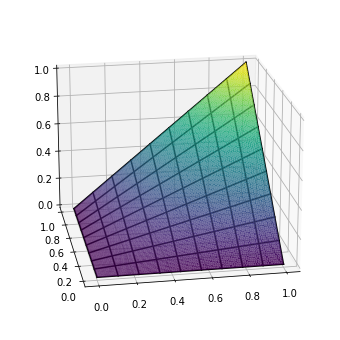

In [5]:
plot_fuzzy_binop(ProductLogic().bin_conjoin)

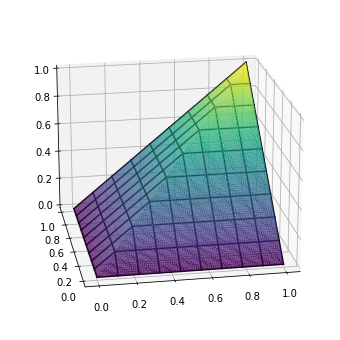

In [6]:
plot_fuzzy_binop(MinimumLogic().bin_conjoin)

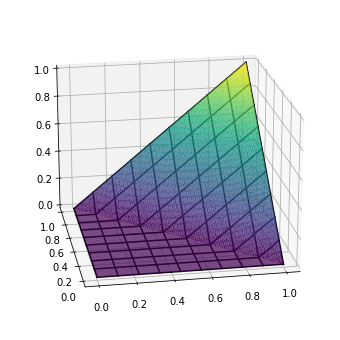

In [7]:
plot_fuzzy_binop(LukasiewiczLogic().bin_conjoin)

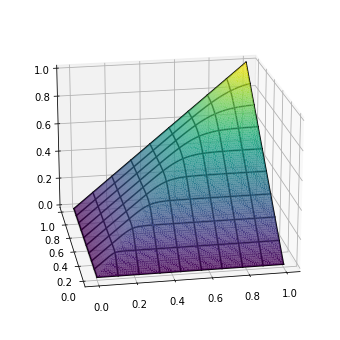

In [14]:
plot_fuzzy_binop(SchweizerSklarLogic(torch.tensor(-10.0)).bin_conjoin)

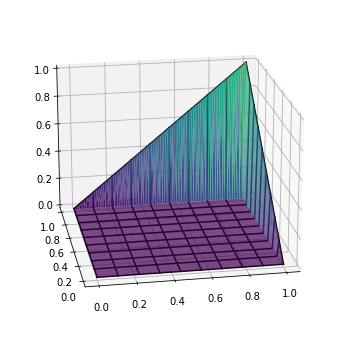

In [9]:
plot_fuzzy_binop(DrasticLogic().bin_conjoin)

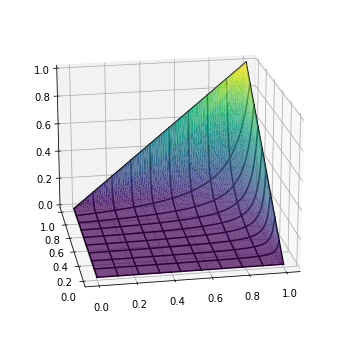

In [10]:
plot_fuzzy_binop(HamacherLogic(torch.tensor(100.0)).bin_conjoin)

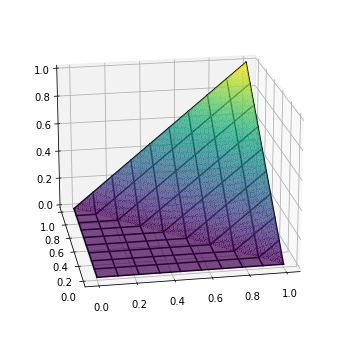

In [11]:
plot_fuzzy_binop(WNLLogic(torch.tensor(2.0)).bin_disjoin)

In [12]:
SchweizerSklarLogic(torch.tensor(-2.0)).bin_conjoin(l1[1], l1[1])

NameError: name 'l1' is not defined

In [ ]:
loss

In [ ]:
((0.000000000000000001 ** -2) + (0.000000000000000001 ** -2) - 2 + 1)**(-1/2)

In [ ]:
0.000000000000000001 * (1 + 1 - (1 * ((0.000000000000000001 ** 2)))) ** (-1/2)

In [ ]:
torch.arange(9).view(3,3).max(dim=1).values.unsqueeze(1)

In [ ]:
torch.arange(9).view(3,3) / torch.arange(9).view(3,3).max(dim=0).values.unsqueeze(0)